## Data Cleaning & Preparation

### **Handling Outlier**


#### Outlier Handling Outlier Data

**What is outlier?**

Wikipedia definition, in statistics, an outlier is an observation point that is distant from other observations.

**How did outlier introduce the population?**
- The outliers can be result of a mistake during data collection
- It can be just an indication of variance in your data


**How detect outliers?**
1. Standard Deviation
2. Boxplot & IQR Score
3. Z-Score

- Etc. (DB Scan Clustering, Isolation Forest, Robust Random Cut Forest)


**1. Standard Deviation**

In statistics, if a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations.

Therefore, if you have any data point that is **more than 3 times the standard deviation**, then those points are very likely to be anomalous or **outliers**

**2. Boxplot & IQR**
- Box plots are a graphical depiction of numerical data through their quartiles.
- The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles
- Interquartile Range (IQR) is important because it is used to define the outliers.
- It is the difference between the third quartile and the first quartile (IQR = Q3 - Q1)
- Outliers in this case are defined as the observations that are below (Q1 - 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Overview**

In [2]:
df = pd.read_csv("data/melb_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Outlier Detection

In [4]:
# split numeric and object data
df_num = df.select_dtypes(include = ['int64','float64'])

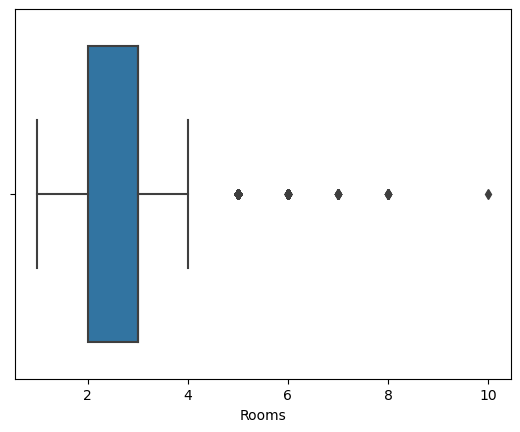

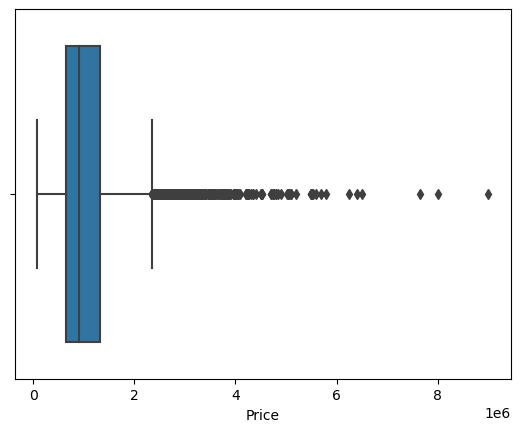

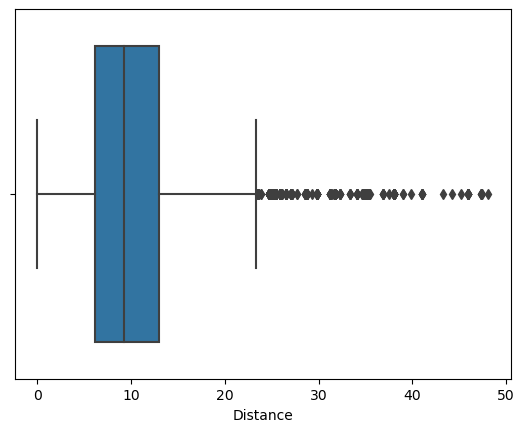

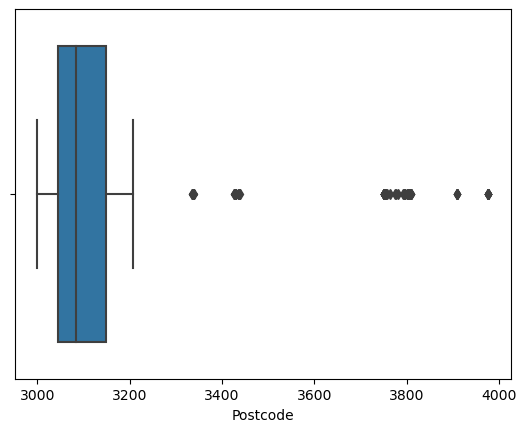

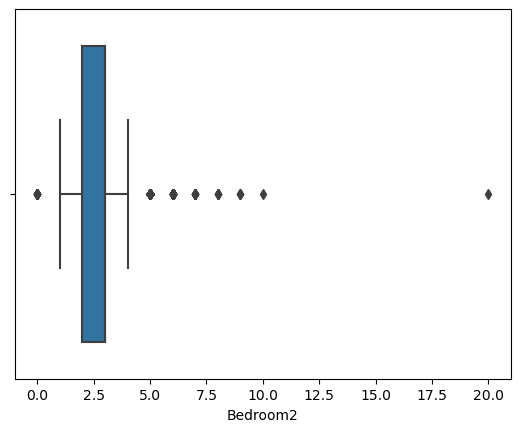

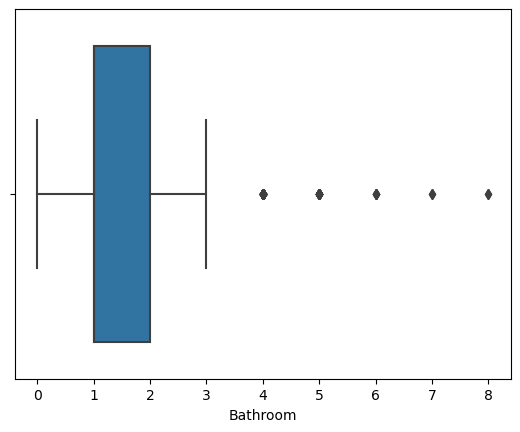

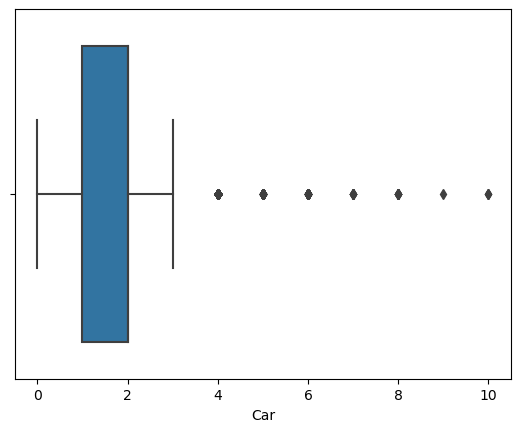

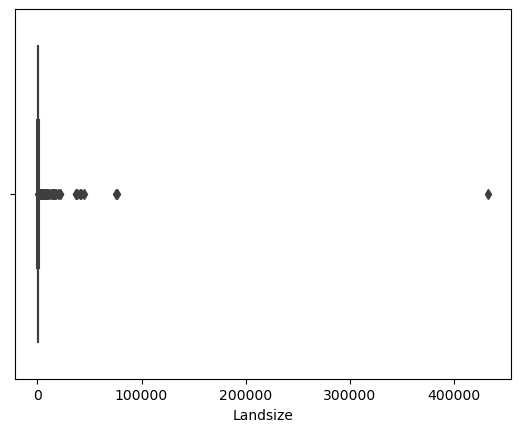

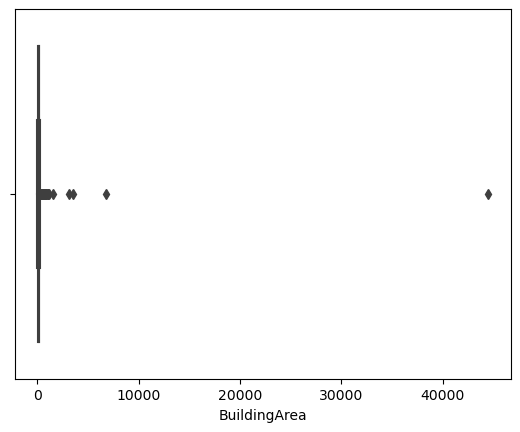

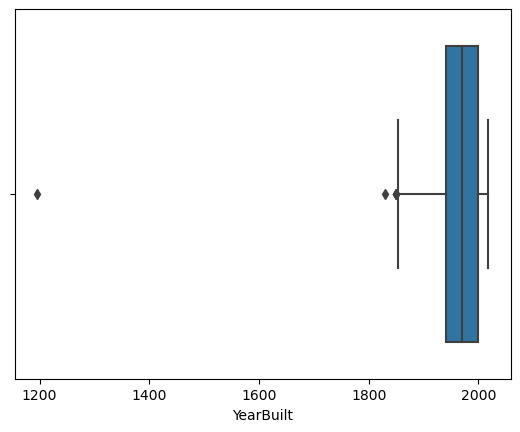

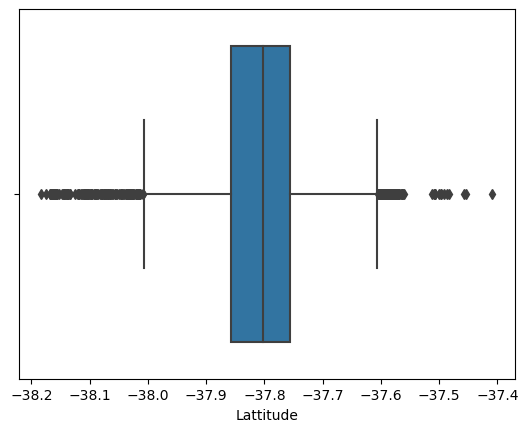

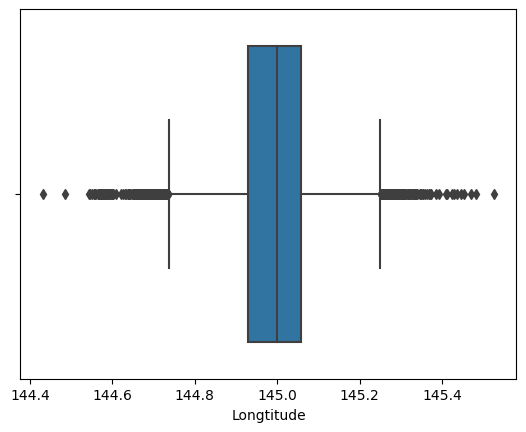

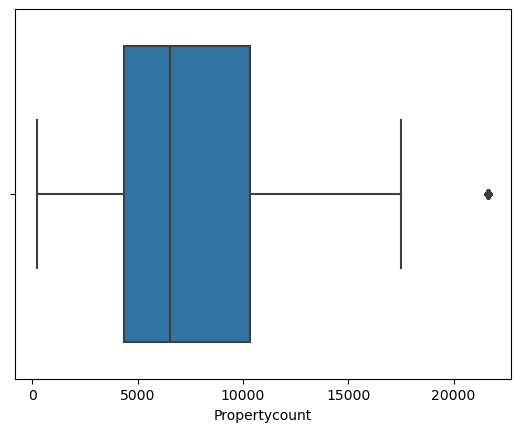

In [5]:
# detecting using boxplot
for i in df_num:
    sns.boxplot(data = df_num, x = i)
    plt.show()

In [6]:
# function to find outliers,using numpy
def find_outliers(yourlist):
    Q1 = np.quantile(yourlist, .25)
    Q2 = np.quantile(yourlist, .50)
    Q3 = np.quantile(yourlist, .75)
    
    IQR = (Q3 - Q1) * 1.5
    batas_bawah = Q1 - IQR
    batas_atas = Q3 + IQR
    
    outlier = ''
    
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier = outlier + str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier = outlier + str(yourlist[i]) + ', '
    return outlier

In [ ]:
import pandas as pd
 
df = pd.read_csv("data.csv")
 
Q1 = (df['TotalCharges']).quantile(0.25)
Q3 = (df['TotalCharges']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = df['TotalCharges'] < minimum
kondisi_more_than = df['TotalCharges'] > maximum
 
df.drop(df[kondisi_lower_than].index, inplace=True)
df.drop(df[kondisi_more_than].index, inplace=True)

In [7]:
# find outliers in distance variable
distance = df['Distance'].sort_values().values.tolist()
print('Jumlah outlier feature distance yaitu:', len(find_outliers(distance)))

Jumlah outlier feature distance yaitu: 2466


In [8]:
# find outliers in distance variable
price = df['Price'].sort_values().values.tolist()
print('Jumlah outlier feature price yaitu:', len(find_outliers(price)))

Jumlah outlier feature price yaitu: 6732


In [9]:
# function to find outliers,using numpy
def find_outliers2(data):
    # hitung nilai q1 dan q3
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)
    
    # hitung nilai IQR
    IQR = Q3 - Q1
    min_iqr = Q1 - 1.5 * IQR
    max_iqr = Q3 + 1.5 * IQR
    
    low_out = []
    high_out = []
    
    for i in data:
        if (i < min_iqr):
            low_out.append(i)
        if (i > max_iqr):
            high_out.append(i)
    return print('Lower outlier: ', low_out, ' || Higher outlier: ', high_out)

In [10]:
# find outliers in distance variable
print(find_outliers2(distance))

Lower outlier:  []  || Higher outlier:  [23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.8, 23.8, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.7, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 24.8, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.2, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 25.9, 26.0, 26.0, 26.0, 26.0, 26.1, 26.1, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.1, 27.1, 27.2,

In [11]:
# find outliers in price variable
print(find_outliers2(price))

Lower outlier:  []  || Higher outlier:  [2352500.0, 2355000.0, 2355000.0, 2355000.0, 2360000.0, 2360000.0, 2360000.0, 2360000.0, 2361000.0, 2365000.0, 2365000.0, 2367000.0, 2368000.0, 2368000.0, 2370000.0, 2370000.0, 2370000.0, 2375000.0, 2375000.0, 2375000.0, 2375000.0, 2375000.0, 2375000.0, 2376000.0, 2380000.0, 2380000.0, 2381000.0, 2385000.0, 2385000.0, 2385000.0, 2385000.0, 2390000.0, 2395000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2400000.0, 2402500.0, 2405000.0, 2405000.0, 2405000.0, 2408000.0, 2410000.0, 2410000.0, 2410000.0, 2410000.0, 2410000.0, 2412000.0, 2415000.0, 2415000.0, 2415000.0, 2420000.0, 2420000.0, 2425000.0, 2425000.0, 2425000.0, 2425000.0, 2425000.0, 2430000.0, 2435000.0, 2439500.0, 2440000.0, 2440000.0, 2444000.0, 24

**3. Z-Score**
- The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured (Wikipedia)
- Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution
- While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers.
- In most of the cases a threshold of 3 or -3 is used i.e. if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [12]:
#import scipy.stats library for z score
from scipy import stats

In [13]:
# z score check
z = np.abs(stats.zscore(distance))

# threshold = 2.5
print(np.where(z > 2.5))
print(np.where(z < -2.5))

(array([13232, 13233, 13234, 13235, 13236, 13237, 13238, 13239, 13240,
       13241, 13242, 13243, 13244, 13245, 13246, 13247, 13248, 13249,
       13250, 13251, 13252, 13253, 13254, 13255, 13256, 13257, 13258,
       13259, 13260, 13261, 13262, 13263, 13264, 13265, 13266, 13267,
       13268, 13269, 13270, 13271, 13272, 13273, 13274, 13275, 13276,
       13277, 13278, 13279, 13280, 13281, 13282, 13283, 13284, 13285,
       13286, 13287, 13288, 13289, 13290, 13291, 13292, 13293, 13294,
       13295, 13296, 13297, 13298, 13299, 13300, 13301, 13302, 13303,
       13304, 13305, 13306, 13307, 13308, 13309, 13310, 13311, 13312,
       13313, 13314, 13315, 13316, 13317, 13318, 13319, 13320, 13321,
       13322, 13323, 13324, 13325, 13326, 13327, 13328, 13329, 13330,
       13331, 13332, 13333, 13334, 13335, 13336, 13337, 13338, 13339,
       13340, 13341, 13342, 13343, 13344, 13345, 13346, 13347, 13348,
       13349, 13350, 13351, 13352, 13353, 13354, 13355, 13356, 13357,
       13358, 13359

In [14]:
# where is the data?
# finding location
outlier_loc = [13232, 13233, 13234, 13235, 13236, 13237, 13238, 13239, 13240]

In [15]:
outlier_data = []
for i in range (len(outlier_loc)):
    outlier_data.append(distance[i])

In [16]:
# print z store data
outlier_data

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7, 0.7, 0.7]

In [21]:
# finding outliers using loop
df.loc[outlier_loc]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13232,Mitcham,1 Dunlavin Rd,4,h,890000.0,S,Buxton,23/09/2017,17.2,3132.0,...,2.0,2.0,481.0,166.0,1965.0,NaN,-37.80961,145.18470,Eastern Metropolitan,6871.0
13233,Mitcham,2 Hardwood Ct,5,h,1150000.0,S,Fletchers,23/09/2017,17.2,3132.0,...,2.0,2.0,588.0,NaN,1970.0,NaN,-37.81153,145.18550,Eastern Metropolitan,6871.0
13234,Mitcham,2/491 Mitcham Rd,3,h,902000.0,PI,Ray,23/09/2017,17.2,3132.0,...,2.0,2.0,327.0,NaN,NaN,NaN,-37.82863,145.19506,Eastern Metropolitan,6871.0
13235,Moonee Ponds,8 Pattison St,3,h,1162000.0,S,Jellis,23/09/2017,6.2,3039.0,...,1.0,2.0,619.0,129.0,1965.0,NaN,-37.76996,144.93466,Western Metropolitan,6232.0
13236,Mooroolbark,4 Bulga St,3,h,835000.0,S,hockingstuart,23/09/2017,26.5,3138.0,...,2.0,1.0,940.0,NaN,NaN,NaN,-37.77403,145.30445,Eastern Victoria,8280.0
13237,Mount Waverley,2 Ormiston St,4,h,1400000.0,S,Ray,23/09/2017,14.2,3149.0,...,2.0,2.0,664.0,NaN,NaN,NaN,-37.86301,145.14145,Eastern Metropolitan,13366.0
13238,Mount Waverley,34 Park La,3,h,1586000.0,S,Stockdale,23/09/2017,14.2,3149.0,...,1.0,1.0,718.0,138.0,1955.0,NaN,-37.88061,145.12449,Eastern Metropolitan,13366.0
13239,Mount Waverley,8 Susan Ct,4,h,1408000.0,S,Jellis,23/09/2017,14.2,3149.0,...,2.0,2.0,692.0,179.0,1970.0,NaN,-37.86445,145.12538,Eastern Metropolitan,13366.0
13240,Mulgrave,12 Brookland Ct,4,h,1080000.0,S,Ray,23/09/2017,18.8,3170.0,...,2.0,2.0,914.0,204.0,1980.0,NaN,-37.93173,145.19475,South-Eastern Metropolitan,7113.0


### **Handling Outliers**
- **DROP** : Not a great option. We lose lots of information. Find out if genuine extreme value or broken sensor.
- **RESCALE** : Log values so outliers don't have as great an effect or you can use Robust Scaler instead.

In [ ]:
# create dataframe
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]
houses

### **Dropping**

In [ ]:
# drop observation greater than some value
houses_clean = houses[houses['Bathrooms'] < 20]
houses_clean

In [ ]:
# locating index using z score
z = np.abs(stats.zscore(distance))

In [ ]:
# dropped outlier
outlier_loc = np.where(z > 2.5)[0].tolist()
df_dropped_outlier = df.loc[~df.index.isin(outlier_loc)]

In [ ]:
# show data after dropping outlier
df_dropped_outlier.head()

### **Rescale** - Not for Data Analysis

In [ ]:
houses['Log_Of_Square_Feet'] = [np.log(x) for x in houses['Square_Feet']]

houses

In [ ]:
from sklearn.preprocessing import RobustScaler

houses['Square_Feet_Rbs'] = RobustScaler().fit_transform(houses[['Square_Feet']])

In [ ]:
houses

### References
1. https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
2. https://chrisalbon.com/machine_learning/preprocessing_structured_data/handling_outliers/
3. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba